In [1]:
import numpy
print('numpy: {}'.format(numpy.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))

numpy: 1.14.5
pandas: 0.23.1


In [2]:
!pwd

/Users/jakewendt/github/jakewendt/notebooks


##FORMAT=<ID=AD,Number=.,Type=Integer,Description="Allelic depths for the ref and alt alleles in the order listed">
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Read depth">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype quality">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=PL,Number=G,Type=Integer,Description="The phred-scaled genotype likelihoods rounded to the closest integer">

##INFO=<ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
##INFO=<ID=AF,Number=A,Type=Float,Description="Allele frequency, for each ALT allele, in the same order as listed">
##INFO=<ID=AN,Number=1,Type=Integer,Description="Total number of alleles in called genotypes">
##INFO=<ID=BaseQRankSum,Number=1,Type=Float,Description="Z-score from Wilcoxon rank sum test of Alt Vs. Ref base qualities">
##INFO=<ID=ClippingRankSum,Number=1,Type=Float,Description="Z-score From Wilcoxon rank sum test of Alt vs. Ref number of hard clipped bases">
##INFO=<ID=DB,Number=0,Type=Flag,Description="dbSNP membership">
##INFO=<ID=DP,Number=1,Type=Integer,Description="Combined depth across samples">
##INFO=<ID=ExcessHet,Number=1,Type=Float,Description="Phred-scaled p-value for exact test of excess heterozygosity">
##INFO=<ID=FS,Number=1,Type=Float,Description="Phred-scaled p-value using Fisher's exact test to detect strand bias">
##INFO=<ID=InbreedingCoeff,Number=1,Type=Float,Description="Inbreeding coefficient as estimated from the genotype likelihoods per-sample when compared against the Hardy-Weinberg expectation">
##INFO=<ID=MLEAC,Number=A,Type=Integer,Description="Maximum likelihood expectation (MLE) for the allele counts, for each ALT allele, in the same order as listed">
##INFO=<ID=MLEAF,Number=A,Type=Float,Description="Maximum likelihood expectation (MLE) for the allele frequency, for each ALT allele, in the same order as listed">
##INFO=<ID=MQ,Number=1,Type=Float,Description="RMS mapping quality">
##INFO=<ID=MQRankSum,Number=1,Type=Float,Description="Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities">
##INFO=<ID=QD,Number=1,Type=Float,Description="Variant Confidence/Quality by Depth">
##INFO=<ID=ReadPosRankSum,Number=1,Type=Float,Description="Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias">
##INFO=<ID=SOR,Number=1,Type=Float,Description="Symmetric Odds Ratio of 2x2 contingency table to detect strand bias">

TSV files created like ...

bcftools query -i 'TYPE="snp"' -f '%CHROM\t%POS\t%QUAL\t%AN\t%DB\t%QD\t%MQ\t[%DP]\t[%GQ]\n' FILE >> FILE.snp.tsv


In [3]:
file = "data/186069.output-hc.snp.tsv"

In [4]:
import glob
print(glob.glob(file))

['data/186069.output-hc.snp.tsv']


In [5]:
#df = pandas.read_csv(file, delimiter="\t")

#df = pandas.read_csv(file, delimiter="\t", dtype={ 'QD': float })

df = pandas.read_csv(file, delimiter="\t", dtype={ 'CHROM': str, 'QD': float }, na_values = ".")


In [6]:
# change QD from "."/NaN to 0.0
df = df.replace({
    'QD': {
        numpy.nan : 0.0,
    },
})

In [7]:
df.head()

,CHROM,POS,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ
0,1,12807,46.77,2,1.0,2.60,25.57,18,75
1,1,13273,728.77,2,1.0,30.37,35.42,24,72
2,1,13418,148.77,2,1.0,5.51,29.65,27,99
3,1,13770,97.77,2,NaN,2.88,24.41,34,99
4,1,13838,175.77,2,1.0,3.59,24.69,49,99


In [8]:
df['DB'].value_counts()

1.0    4426703
Name: DB, dtype: int64

DB=1 means its in dbSNP?

In [9]:
df['AN'].value_counts()

2    4697053
Name: AN, dtype: int64

So the AN field is pointless?

In [10]:
import matplotlib.pyplot as plt

In [11]:
# For some reason, if this is in the same call as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [16.0,6.0]

In [12]:
dbnosnp=df[pandas.isna(df['DB'])]

In [13]:
dbnosnp.shape

(270350, 9)

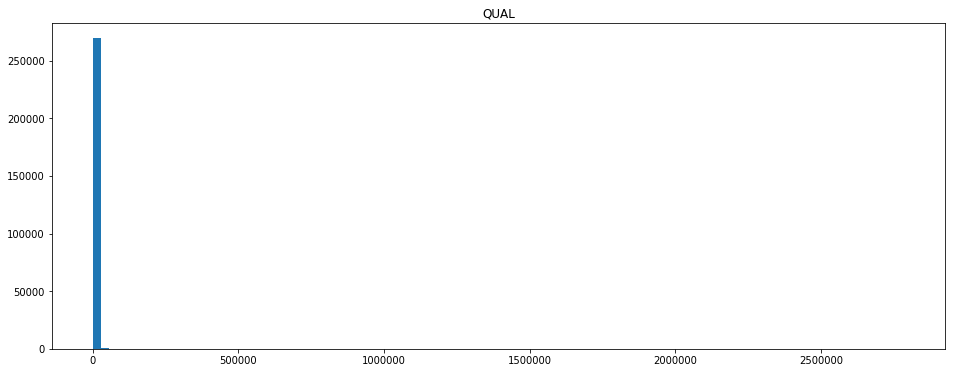

In [14]:
plt.hist(dbnosnp['QUAL'], bins=100)
plt.title('QUAL')
plt.show()

In [15]:
dbnosnp[dbnosnp['QUAL'] > 10000].shape

(4159, 9)

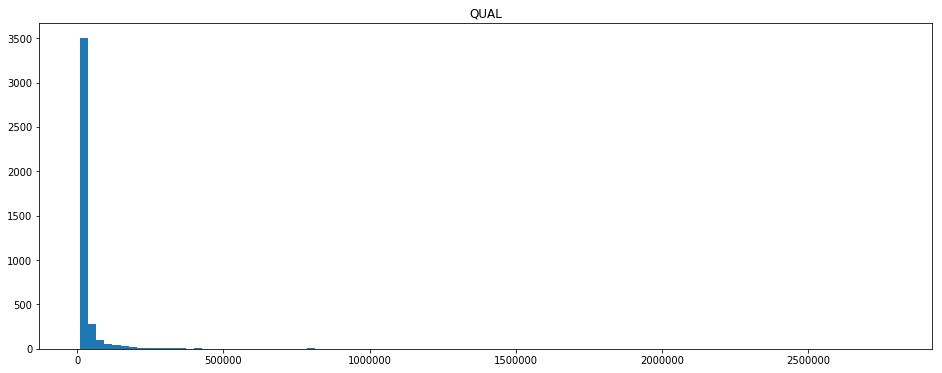

In [16]:
plt.hist(dbnosnp[dbnosnp['QUAL'] > 10000]['QUAL'], bins=100)
plt.title('QUAL')
plt.show()

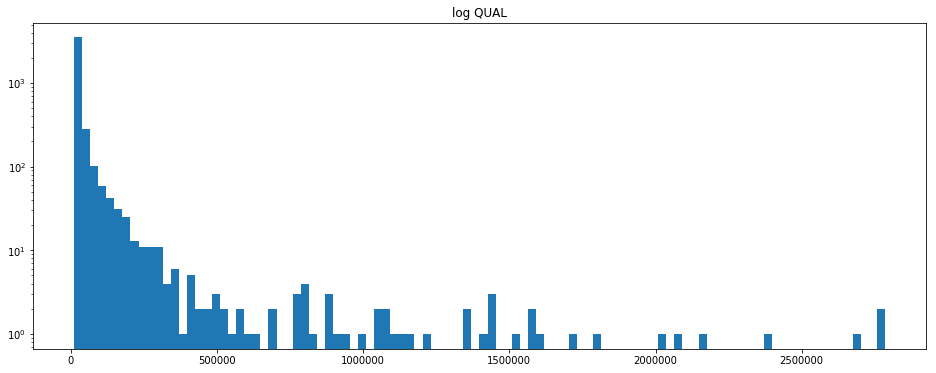

In [17]:
plt.hist(dbnosnp[dbnosnp['QUAL'] > 10000]['QUAL'], bins=100)
plt.title('log QUAL')
plt.yscale('log')
plt.show()

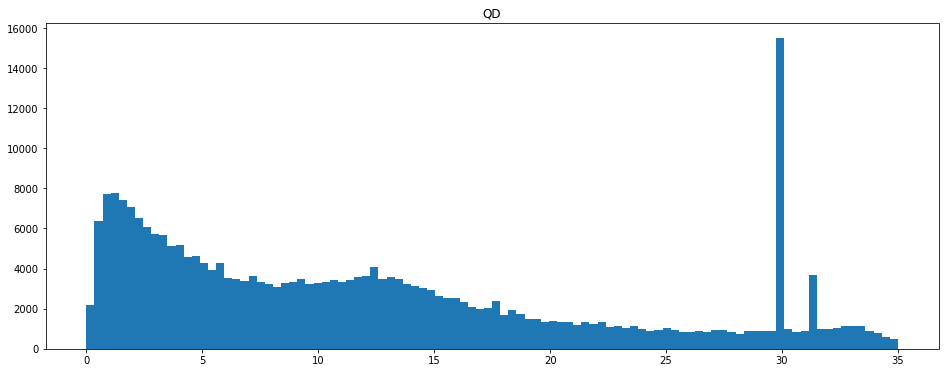

In [18]:
plt.hist(dbnosnp['QD'], bins=100)
plt.title('QD')
plt.show()

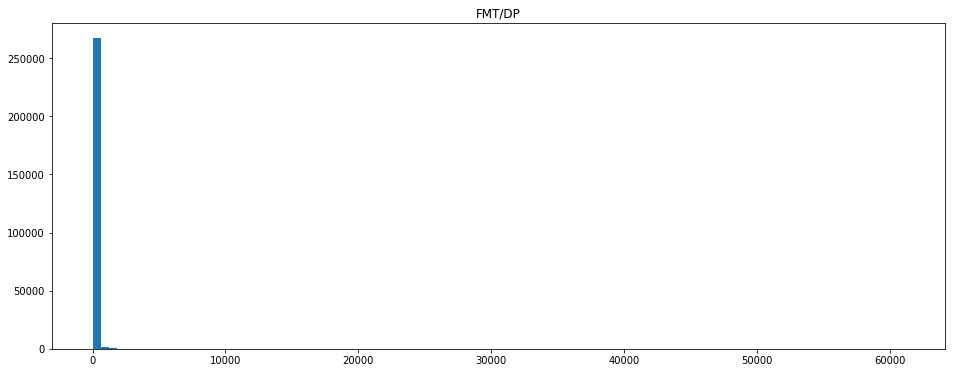

In [19]:
plt.hist(dbnosnp['FMT/DP'], bins=100)
plt.title('FMT/DP')
plt.show()

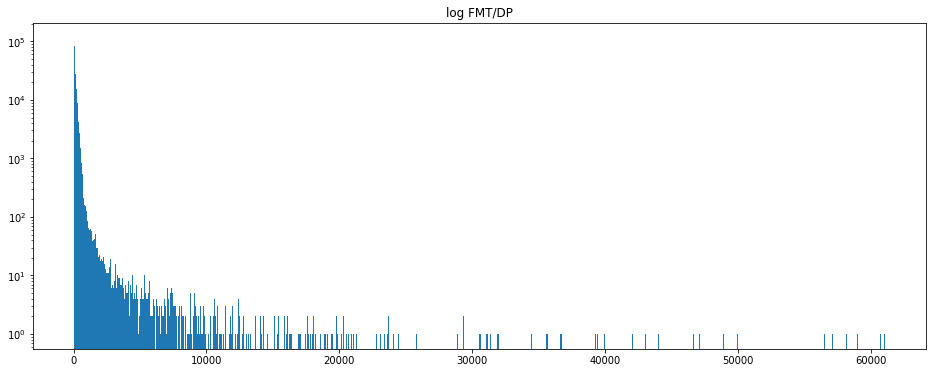

In [20]:
plt.hist(dbnosnp['FMT/DP'], bins=1000)
plt.title('log FMT/DP')
plt.yscale('log')
plt.show()

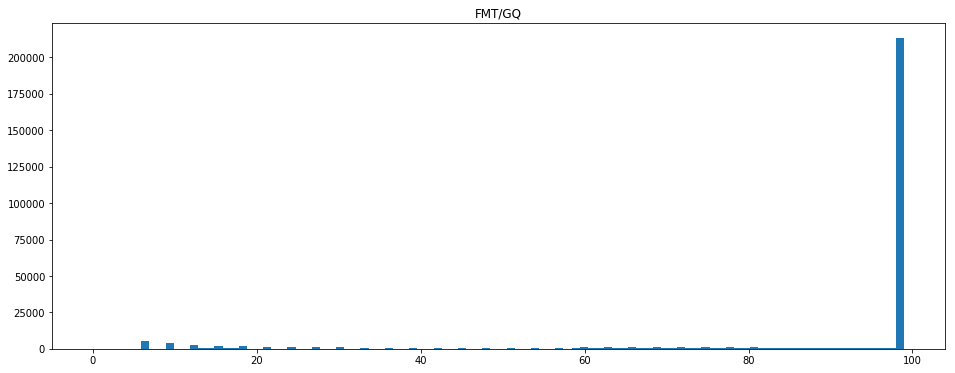

In [21]:
plt.hist(dbnosnp['FMT/GQ'], bins=100)
plt.title('FMT/GQ')
plt.show()

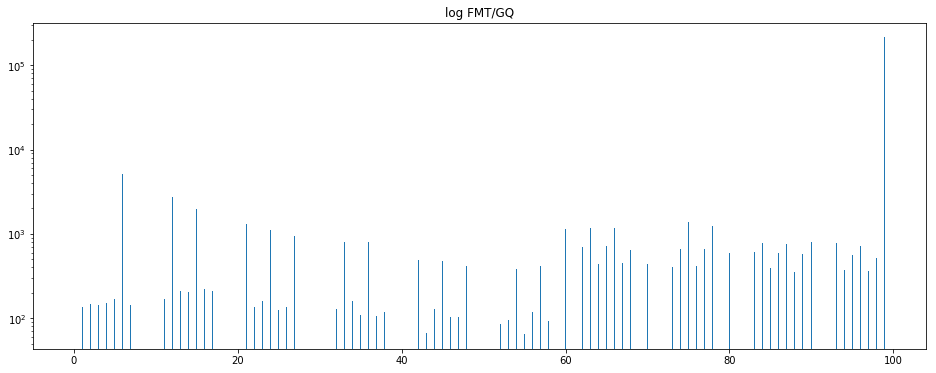

In [22]:
plt.hist(dbnosnp['FMT/GQ'], bins=1000)
plt.title('log FMT/GQ')
plt.yscale('log')
plt.show()

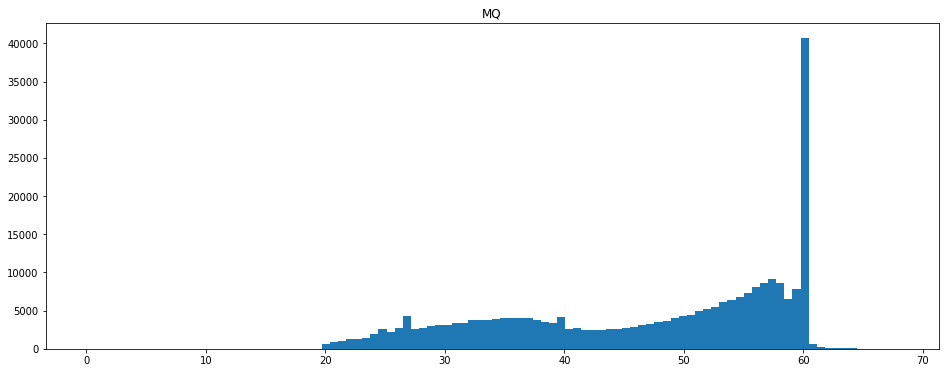

In [23]:
plt.hist(dbnosnp['MQ'], bins=100)
plt.title('MQ')
plt.show()

In [24]:
dbnosnp[ ( dbnosnp['QUAL'] > 5000 ) & ( dbnosnp['QD'] > 10 ) & ( dbnosnp['FMT/DP'] > 20 ) & ( dbnosnp['FMT/GQ'] > 90 ) & ( dbnosnp['MQ'] > 50 ) ]

,CHROM,POS,QUAL,AN,DB,QD,MQ,FMT/DP,FMT/GQ
184701,1,125079862,6737.77,2,NaN,27.96,58.25,241,99
184723,1,125080306,5296.77,2,NaN,21.27,59.90,249,99
184727,1,125080369,15917.80,2,NaN,30.00,59.91,445,99
184731,1,125080404,15508.80,2,NaN,30.00,59.65,434,99
184736,1,125080458,11432.80,2,NaN,25.46,59.46,449,99
184737,1,125080489,12999.80,2,NaN,26.32,59.43,494,99
184761,1,125081164,5672.77,2,NaN,13.47,56.98,421,99
184763,1,125081181,14879.80,2,NaN,30.00,57.59,412,99
184768,1,125081269,13291.80,2,NaN,30.00,57.89,379,99
184769,1,125081273,8901.77,2,NaN,22.65,57.52,393,99
